# CSCA-5642: Diaster Tweets Classification Analysis Project #
#### Develop an algorithm to predict which Tweets are about real disasters and which ones are not. ####
    
* Author: Alexander Meau  
* Email: alme9155@colorado.edu  
* GitHub: [https://github.com/alme9155/csca-5642-week4/tree/main](https://github.com/alme9155/csca-5642-week4/tree/main)  


## I. Brief description of the problem and data ##

This project aims to tackle the Natural diaster tweet prediction to run a binary text classification whether a tweet refers to a real disaster event or not.
### Dataset: ####
* The competition dataset contains 3 CSV files: "train.csv", "test.csv" and "sample_submission.csv".
* File "train.csv" contains development data with target label (target=1) or not (target=0).
* File "test.csv" contains test data to be classified for the competition.
* File "sample_submission.csv" contains sample submission format after text classification prediction.

### Data Size and Dimension ####
* Training dataset: ~7000 tweet text with unique 'ID' columns and 'target' (0 - disaster, 1 - not diaster)
* Test dataset: ~3200 tweet text with same column structure as 'train.csv' without 'target' column.
* Both Training and Test dataset contains a 'keyword' column, such as "file", "earthquake"
* Both Training and Test dataset contains a 'location' with optional text value.

### Competition Rules ###
* Expected submission CSV files in the same format as "sample_submission.csv" with two columns "id, target". (id: unique id from test set, target: 0, or 1)

In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
print('File Listing from Kaggle Competition.')

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/glove-twitter-27b-100d-from-standford-nlp/glove.twitter.27B.100d.txt
File Listing from Kaggle Competition.


## II. Exploratory Data Analysis (EDA) ##
### II.i Data Exploration ###
- Inspect CSV file dimension (num of rows x num of columns)
- Inspect distribution of 'keyword', 'location' and 'target' columns

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

print('Common library loaded.')

Common library loaded.


In [3]:
import pandas as pd
import os 

train_df = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test_df = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
sample_submission_df = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')
print('Data File loaded.')

Data File loaded.


In [4]:
# Explore Development DataSet
print(f"\n{'=' * 10}Development DataSet (train.csv): {'=' * 10}\n")
display(train_df.head(10))
max_text_length_dev = train_df['text'].str.len().max()
print(f"Dimension of the development set: {train_df.shape[0]} rows, {train_df.shape[1]} columns")
print(f"Max length of Tweet text in Dev. DataSet: {max_text_length_dev}")

# Explore Test DataSet:
print(f"\n{'=' * 10}Test DataSet (test.csv): {'=' * 10}\n")
display(test_df.head(10))
max_text_length_test = test_df['text'].str.len().max()
print(f"Dimension of the development set: {test_df.shape[0]} rows, {test_df.shape[1]} columns")
print(f"Max length of Tweet text in Test DataSet: {max_text_length_test}")


# Explore Sapmle Submission file format:
print(f"\n{'=' * 10}Test DataSet (sample_submission.csv): {'=' * 10}\n")
display(sample_submission_df.head(5))
print(f"Dimension of the development set: {sample_submission_df.shape[0]} rows, {sample_submission_df.shape[1]} columns")



==========Development DataSet (train.csv): ==========



,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


Dimension of the development set: 7613 rows, 5 columns
Max length of Tweet text in Dev. DataSet: 157

==========Test DataSet (test.csv): ==========



,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


Dimension of the development set: 3263 rows, 4 columns
Max length of Tweet text in Test DataSet: 151

==========Test DataSet (sample_submission.csv): ==========



,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


Dimension of the development set: 3263 rows, 2 columns


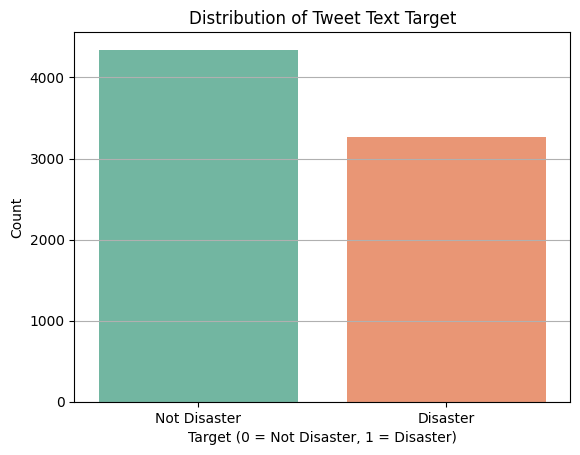

Rows missing 'target' value: 0 row(s)
--------------------
target
0    0.57034
1    0.42966
Name: proportion, dtype: float64


In [5]:
### Explore target column distribution of Tweet text.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=train_df, x='target', palette='Set2')
plt.title("Distribution of Tweet Text Target")
plt.xlabel("Target (0 = Not Disaster, 1 = Disaster)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Not Disaster', 'Disaster'])
plt.grid(axis='y')
plt.show()

missing_target_count = train_df['target'].isnull().sum()
print(f"Rows missing 'target' value: {missing_target_count} row(s)")
print('--------------------')
print(train_df['target'].value_counts(normalize=True))



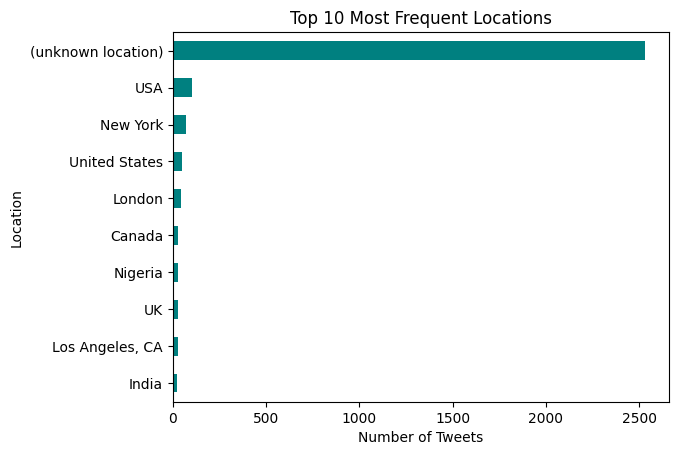

Rows missing 'location' value: 2533 row(s)
% of Rows missing 'location' value: 0.33
--------------------
location
USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: count, Length: 3341, dtype: int64


In [6]:
### Explore location column distribution of Tweet text.
train_location_df = train_df['location'].fillna('(unknown location)')
top_locations = train_location_df.value_counts().head(10)
top_locations.plot(kind='barh', color='teal')
plt.title("Top 10 Most Frequent Locations")
plt.xlabel("Number of Tweets")
plt.ylabel("Location")
plt.gca().invert_yaxis()
plt.show()

missing_location_count = train_df['location'].isnull().sum()
print(f"Rows missing 'location' value: {missing_location_count} row(s)")
print(f"% of Rows missing 'location' value: {missing_location_count/len(train_df):.2f}")
print('--------------------')
print(train_df['location'].value_counts(normalize=False))


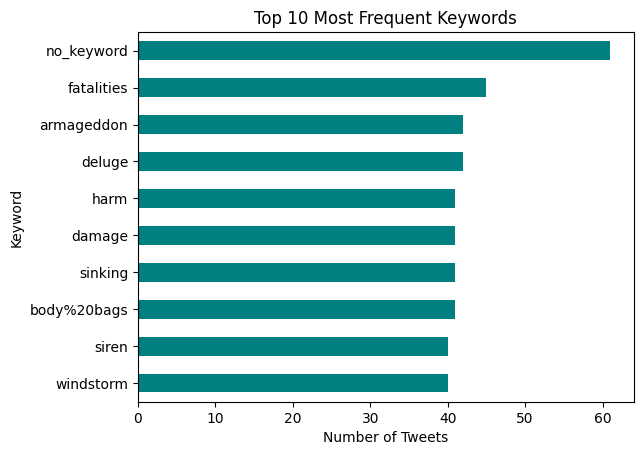

Rows missing 'keyword' value: 0 row(s)
% of Rows missing 'keyword' value: 0.00
--------------------
keyword
no_keyword               61
fatalities               45
armageddon               42
deluge                   42
harm                     41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 222, dtype: int64


In [1]:
### Explore keyword column distribution of Tweet text.
train_keyword_missing_df = train_df['keyword'].fillna('(keyword missing)')
top_locations = train_keyword_missing_df.value_counts().head(10)
top_locations.plot(kind='barh', color='teal')
plt.title("Top 10 Most Frequent Keywords")
plt.xlabel("Number of Tweets")
plt.ylabel("Keyword")
plt.gca().invert_yaxis()
plt.show()

missing_keyword_count = train_df['keyword'].isnull().sum()
print(f"Rows missing 'keyword' value: {missing_keyword_count} row(s)")
print(f"% of Rows missing 'keyword' value: {missing_keyword_count/len(train_df):.2f}")
print('--------------------')
print(train_df['keyword'].value_counts(normalize=False))


## II. Exploratory Data Analysis (EDA) ##
### II.ii. Data Analysis Summary ###
- The training dataset is slightly imbalanced (~57% of non-disaster tweets, ~43%) in the 'text' column.
- There is high missing rate in the 'location' column (33% of the column are empty.)
- On the contrary, only 1% of missing rate in the 'keyword' column.

### II.iii. Data Preparation ###
- It is recommended to apply the scikit-learn library on the 'text' column and use the compute_class_weight() method to modify the loss function. The computed weight metric allows the Keras library to adjust the weights during optimization.
- A high missing rate in the 'location' rate will introduce noise without bringing in much semantic value to the disaster text classification. Thus, the 'location' column should be ignored for this exercise.
- On the other hand, the 'keyword' column only has a 1% missing rate, and there are special keywords such as 'fatalities' and 'armageddon' in the dataset that can be used for disaster prediction.
- It is best to concatenate the 'keyword' column with the 'text' column to create a 'combined_text' column for the NLP processing instead of using a multi-input LSTM model with both 'keyword' and 'text' columns.
- Before concatenating the columns, missing values in the keyword column should be filled in with 'no_keyword' before NLP processing.
- Word2Vec library
The training dataset is slightly imbalanced (~57% of non-disaster tweets, ~43%) in the 'text' column. It is recommended to apply the scikit-learn library, the compute_class_weight() method to modify the loss function, allowing the Keras library to adjust the weights during optimization.


Weight dictionary: {0: 0.8766697374481806, 1: 1.1637114032405993}


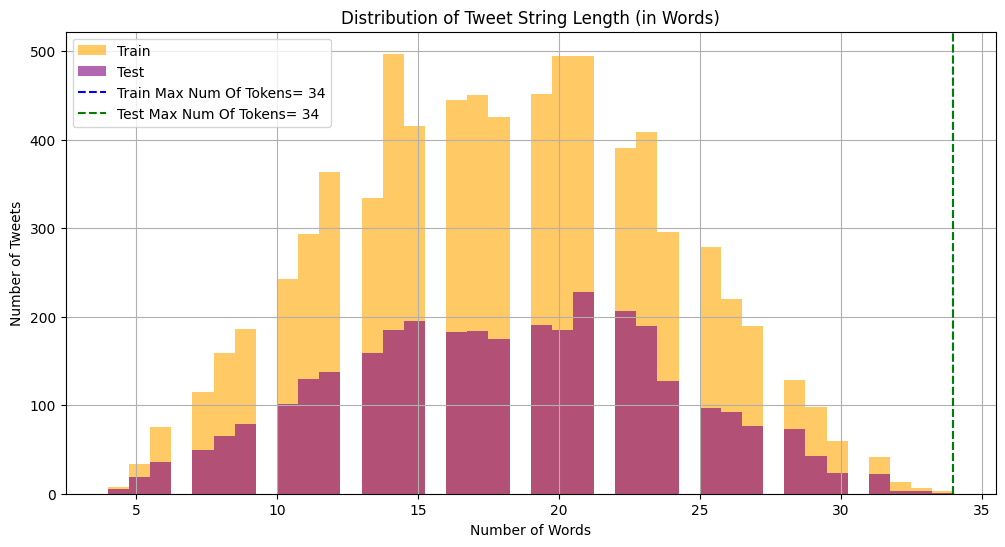

Data preparation complete.


In [8]:
# Data preparation before modeling
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

train_df['keyword'] =  train_df['keyword'].fillna('no_keyword')  
train_df['combined_text'] = '[KEYWORD] ' + train_df['keyword'] + ' [TEXT] ' + train_df['text']

test_df['keyword'] = test_df['keyword'].fillna('no_keyword')  
test_df['combined_text'] = '[KEYWORD] ' + test_df['keyword'] + ' [TEXT] ' + test_df['text']

# compute weight metrics
target_label = train_df['target'].values
unique_target = np.unique(target_label)  
weight = compute_class_weight(class_weight='balanced', classes=unique_target, y=target_label)
target_weight_dict = dict(zip(unique_target, weight))
print(f"Weight dictionary: {target_weight_dict}")

#show histogram of 'combined_text'
train_df['length_combined_text'] = train_df['combined_text'].apply(lambda x: len(str(x).split()))
test_df['length_combined_text'] = test_df['combined_text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(12, 6))
plt.hist(train_df['length_combined_text'], bins=40, alpha=0.6, label='Train', color='orange')
plt.hist(test_df['length_combined_text'], bins=40, alpha=0.6, label='Test', color='purple')
plt.axvline(train_df['length_combined_text'].max(), color='blue', linestyle='--', label=f'Train Max Num Of Tokens= {train_df["length_combined_text"].max()}')
plt.axvline(test_df['length_combined_text'].max(), color='green', linestyle='--', label=f'Test Max Num Of Tokens= {test_df["length_combined_text"].max()}')
plt.title('Distribution of Tweet String Length (in Words)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Tweets')
plt.legend()
plt.grid(True)
plt.show()

print('Data preparation complete.')

## III. Model Architecture ##

### III.i. Model Description ###
- This model implements Natural Language Processing (NLP) using Recurrent Neural Network (RNN) based model with pre-trained Word2Vec embedding.

### III.ii. NLP Word Embedding ###
- **Word2Vec** transforms words in the dataset into dense vector representations, capturing their semantic and contextual relationships.
- The resulting vectors correspond to words in the Word2Vec vocabulary, where the distance between two word vectors reflects their semantic or contextual similarity.
- The latent vector space learned by Word2Vec enables the model to infer relationships between words, even if certain words did not appear together in the training data.
- Since the total volume of the Tweeter text provided in this competition is less than 10,000 records (~7000), there is insufficient data to train any NLP engine to have meaningful contextual embeddings from scratch.
- To address this low resource probelm, I have to apply concept of transfer learning to use a pre-trained GloVe embedding from standford NLP project to fine-tune to this competition dataset: Ref:[https://nlp.stanford.edu/projects/glove/](https://nlp.stanford.edu/projects/glove/)
- Number of Parameters in this pre-trained embedding file = 1,200,000 words × 100 dimensions/word = 120,000,000
- For more information with NLP processing, please refer to the course material in **CSCA-5842: Deep Learning for Natural Language Processing.**

### III.iii. NLP Specific Technique ###
- **Word2Vec** require lemmatization to convert different part of speech to the base dictionary (e.g. "running" -> "run")
- The technique of stopword removal is also required to remove common words such as "the", "is", "and" that carry little semantic meaning but appears frequently.
- Text must be normalized to lowercase to ensure consistent vector matching.
- Punctuation should be removed to align with standard preprocessing practices and improve tokenization.
- URLs, which typically lack semantic value, should also be removed to enhance the quality of the input text.

### III.iv. RNN Model Architecture ###
- According to the word token distribution above, both the dataset has less than 35 tokens in the combined text, and with average 15-22 tokens for most of the combined Tweet text.
- This RNN model contains 3 layers:
  - A sequential layer with 64 units of LSTM to learn the vocabulary words
  - A dropout layer of dropout rate 50% to avoid overfittingingle layer with 64 units should be sufficient for text classiin the latent embeded space provide contextual similiarity
- Model begins with 32 filters, and then this hyperparameter value doubled of each subsequent layer: 32, 64, 128 
- Since each image size is 96 x 96 pixel of RGB channel, input shape = (96,96, 3)
- To avoid overfitting, each convolution block is matched with pooling layer and batch-normalization.
- First layer use 5x5 kernel to learn major feature and then 3x3 kernel following inspiration of VGG-16. 

#### Reference ###
- Ref: [https://nlp.stanford.edu/projects/glove/](https://nlp.stanford.edu/projects/glove/)
- Ref: [https://www.coursera.org/learn/deep-learning-natural-language-processing](https://www.coursera.org/learn/deep-learning-natural-language-processing)
- Ref: [https://www.coursera.org/learn/fundamentals-natural-language-processing](https://www.coursera.org/learn/fundamentals-natural-language-processing)
- Ref: [https://www.analyticsvidhya.com/blog/2021/06/lstm-for-text-classification](https://www.analyticsvidhya.com/blog/2021/06/lstm-for-text-classification)


In [9]:
import pandas as pd
import re
import emoji
from urllib.parse import unquote
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# pre-processing text to use gloVe Word2Vec embedding
# combined_text field is separated by keyword: '[KEYWORD] ' + train_df['keyword'] + ' [TEXT] ' + train_df['text']
def preprocess_text(text):
    parts = re.split(r'\[KEYWORD\]|\[TEXT\]', text)
    if len(parts) >= 3:
        keyword = parts[1].strip()  # Extract keyword (between [KEYWORD] and [TEXT])
        main_text = parts[2].strip()  # Extract main text (after [TEXT])
    else:
        keyword = ''
        main_text = text
        
    main_text = main_text.lower()
    main_text = re.sub(r'http\S+|www\S+|https\S+', '', main_text, flags=re.MULTILINE)
    main_text = re.sub(r'[^\w\s]', '', main_text)
    main_text = emoji.demojize(main_text)
    words = nltk.word_tokenize(main_text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    processed_text = ' '.join(words)
    return f'[KEYWORD] {keyword} [TEXT] {processed_text}' if keyword else processed_text

train_df['normalized_text'] = train_df['combined_text'].apply(preprocess_text)
test_df['normalized_text'] = test_df['combined_text'].apply(preprocess_text)

print('text normalization complete.')


text normalization complete.


In [3]:
# loading Keras library
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam

print('Keras library loaded.')

Keras library loaded.


In [56]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score, classification_report
from tensorflow.keras.metrics import AUC
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Bidirectional

## Word2Vec RNN Model class
class Word2VecRNNClassifier:
    def __init__(self, 
                 embedding_params: dict,
                 sequence_model_params: dict,
                 class_weights: dict = None,
                 pretrained_embedding_path = None):
        """
        Initializes the TextClassifier with embedding-specific and sequence-specific dictionaries.
        """
        #unpack embedding parameters
        self.vocabulary_size = embedding_params['vocabulary_size']
        self.embedding_dimension = embedding_params['embedding_dimension']
        self.max_length = embedding_params['max_length']

        #unpack sequential parameters
        self.rnn_units = sequence_model_params.get('rnn_units', 128)
        self.dense_units = sequence_model_params.get('dense_units', 32)
        self.dropout_rate = sequence_model_params.get('dropout_rate', 0.2)
        self.num_classes = sequence_model_params.get('num_classes', 2)
        self.use_gru = sequence_model_params.get('use_gru', False)
        self.learning_rate = sequence_model_params.get('learning_rate', 1e-3)

        self.embedding_matrix = None
        self.trainable_embeddings = False
        self.model = None

    def load_glove_embeddings(self, filepath, tokenizer, embedding_dim=100, max_vocab_size=10000):
        """
        Load pre-trained gloVe embedding file
        """        
        embedding_index = {}
        with open(filepath, encoding='utf-8') as f:
            for line in f:
                values = line.split()
                word = values[0]
                coefs = np.asarray(values[1:], dtype='float32')
                embedding_index[word] = coefs
    
        word_index = tokenizer.word_index
        vocabulary_size = min(len(word_index) + 1, max_vocab_size)
        embedding_matrix = np.zeros((vocabulary_size, embedding_dim))

        match_count = 0
        for word, i in word_index.items():
            if i < max_vocab_size:
                vector = embedding_index.get(word)
                if vector is not None:
                    embedding_matrix[i] = vector
                    match_count += 1
                else:
                    np.random.seed(42)
                    embedding_matrix[i] = np.random.normal(scale=0.6, size=(embedding_dim,))
        self.embedding_matrix = embedding_matrix
        self.vocabulary_size = vocabulary_size
        matching_rate = match_count / min(len(word_index), max_vocab_size)  # Add this line
        print(f"Matching Rate: {matching_rate:.4f} ({match_count} out of {min(len(word_index), max_vocab_size)} words)") 
    
    
    def build_model(self):
        """
        Build Sequential model based on parameters
        """
        self.model = Sequential()
        if self.embedding_matrix is not None:
            self.model.add(Embedding(input_dim=self.vocabulary_size,
                              output_dim=self.embedding_dimension,
                              weights=[self.embedding_matrix],
                              trainable=self.trainable_embeddings))
        else:
            print("Using randomly initialized embeddings.")
            self.model.add(Embedding(self.vocabulary_size,
                                     self.embedding_dimension))
        # single layer RNN 
        if self.use_gru:
            self.model.add(Bidirectional(GRU(self.rnn_units, activation='relu',return_sequences=False)))
        else:
            self.model.add(Bidirectional(LSTM(self.rnn_units, activation='relu', return_sequences=False)))
        self.model.add(Dropout(self.dropout_rate))
        
        self.model.add(Dense(self.dense_units, activation='relu'))
        self.model.add(Dropout(self.dropout_rate))
        self.model.add(Dense(1, activation='sigmoid'))
        self.model.compile(optimizer=Adam(self.learning_rate), loss='binary_crossentropy', metrics=['accuracy', 'auc'])
        return self.model

    def fit(self, X_train, y_train, X_val=None, y_val=None, epochs=5, batch_size=32, class_weights=None, callbacks=None):
        """
        Fit for development set
        """
        history = None
        if self.model is None:
            raise ValueError("Model is not built. Call build_model() first.")
        fit_args = {
            'x': X_train,
            'y': y_train,
            'epochs': epochs,
            'batch_size': batch_size,
            'verbose': 1,
            'validation_data': (X_val, y_val) if X_val is not None and y_val is not None else None,
        }
    
        if class_weights is not None:
            fit_args['class_weight'] = class_weights
    
        if callbacks is not None:
            fit_args['callbacks'] = callbacks

        history = self.model.fit(**fit_args)        
        return history

    def predict(self, X_test, y_test=None, threshold=0.5):
        """
        Predict on test dataset. Default threshold is >0.5 = True; False otherwise.
        """        
        if self.model is None:
            raise ValueError("Model is not built or trained yet.")
        
        y_pred_prob = self.model.predict(X_test)
        y_pred = (y_pred_prob >= 0.5).astype(int)
        
        if y_test is not None:
            f1 = f1_score(y_test, y_pred)
            print(f"F1 Score: {f1:.4f}")
            return y_pred, f1
        else:
            return y_pred


    def evaluate(self, X_test, y_test, threshold=0.5):
        """
        Evaluate model performance on test/dev set.
        Returns a dictionary with loss, accuracy, AUC, and F1 score.
        """
        if self.model is None:
            raise ValueError("Model is not built or trained yet.")
        
        # Evaluate using Keras built-in metrics
        results = self.model.evaluate(X_test, y_test, verbose=0)
        metrics_names = self.model.metrics_names
        results_dict = dict(zip(metrics_names, results))
        
        # Custom F1 score using threshold
        y_pred_prob = self.model.predict(X_test)
        y_pred = (y_pred_prob >= threshold).astype(int)
        f1 = f1_score(y_test, y_pred)
        
        results_dict['f1_score'] = f1
        results_dict['y_pred_prob'] = y_pred_prob
        results_dict['y_pred'] = y_pred
        print("Evaluation Results:")
        for key, value in results_dict.items():
            if key not in ['y_pred_prob', 'y_pred']:
                print(f"{key}: {value:.4f}")        
        return results_dict

    def save_model(self, filepath='model.h5'):
        """
        Saves the trained model to a file.
        """
        if self.model is None:
            raise ValueError("Model not built or trained.")
        self.model.save(filepath)
        print(f"Model saved to {filepath}")
    
    def load_model_from_file(self, filepath='model.h5'):
        """
        Loads a model from a .h5 file.
        """
        self.model = load_model(filepath)
        print(f"Model loaded from {filepath}")


MAX_SEQUENCE_LENGTH = 40

initial_embedding_params = {
    'vocabulary_size': 10000, 
    'embedding_dimension': GLOVE_EMBEDDING_DIMENSION,
    'max_length': MAX_SEQUENCE_LENGTH
}

sequence_model_params = {
    'rnn_units': 128,
    'dense_units': 32,
    'dropout_rate': 0.2,
    'num_classes': 2,
    'use_gru': False,
    'learning_rate': 1e-3
}

single_layer_rnn_model = Word2VecRNNClassifier(initial_embedding_params, sequence_model_params)
print('Single Layer RNN model defined...')

Single Layer RNN model defined...


In [57]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# compute weight metrics
target_label = train_df['target'].values
unique_target = np.unique(target_label)  
weight = compute_class_weight(class_weight='balanced', classes=unique_target, y=target_label)
target_weight_dict = dict(zip(unique_target, weight))
print(f"Weight dictionary: {target_weight_dict}")


# tokenize train and test set
tokenizer = Tokenizer(num_words=MAX_SEQUENCE_LENGTH, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['combined_text'])
X_train_glove = tokenizer.texts_to_sequences(train_df['normalized_text'])
X_train_glove = pad_sequences(X_train_glove, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
X_test_glove = tokenizer.texts_to_sequences(test_df['normalized_text'])
X_test_glove = pad_sequences(X_test_glove, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
y_train = train_df['target'].values
y_test = train_df['target'].values

# load pre-trained embedding and evaulate model
GLOVE_EMBEDDING_DIMENSION = 100
GLOVE_FILEPATH = '/kaggle/input/glove-twitter-27b-100d-from-standford-nlp/glove.twitter.27B.100d.txt'

X_train_rnn, X_val_rnn, y_train_rnn, y_val_rnn = train_test_split(X_train_glove, y_train, test_size=0.2, random_state=42)
single_layer_rnn_model = Word2VecRNNClassifier(initial_embedding_params, sequence_model_params)
single_layer_rnn_model.load_glove_embeddings(GLOVE_FILEPATH, tokenizer, embedding_dim=GLOVE_EMBEDDING_DIMENSION)
single_layer_rnn_model.build_model()

single_layer_rnn_history = single_layer_rnn_model.fit(X_train_rnn, y_train_rnn, X_val=X_val_rnn, y_val=y_val_rnn, epochs=10, batch_size=32, class_weights=target_weight_dict)
single_layer_eval_results =single_layer_rnn_model.evaluate(X_val_rnn, y_val_rnn)
y_test_preds = single_layer_rnn_model.predict(X_test_glove)
single_layer_rnn_model.save_model("single_layer_rnn_model.h5")

Weight dictionary: {0: 0.8766697374481806, 1: 1.1637114032405993}
Matching Rate: 0.7283 (7283 out of 10000 words)
Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.5140 - auc: 0.5297 - loss: 0.6953 - val_accuracy: 0.5568 - val_auc: 0.6354 - val_loss: 0.6798
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5403 - auc: 0.5653 - loss: 0.6875 - val_accuracy: 0.6080 - val_auc: 0.6341 - val_loss: 0.6619
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5442 - auc: 0.5731 - loss: 0.6849 - val_accuracy: 0.5804 - val_auc: 0.6399 - val_loss: 0.6648
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5738 - auc: 0.6150 - loss: 0.6681 - val_accuracy: 0.5955 - val_auc: 0.6415 - val_loss: 0.6475
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5742 - auc: 0.6081 - loss: 0.6678 - val_accuracy: 0.6093 - val_auc: 0.6394 - val_loss: 0.6521
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5685 - auc: 0

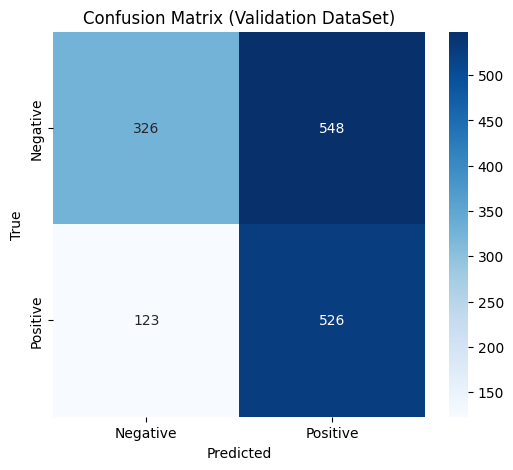


Confusion Matrix Metrics:
True Negatives (TN): 326
False Positives (FP): 548
False Negatives (FN): 123
True Positives (TP): 526


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# display confusion matrix
y_pred_eval = eval_results['y_pred']
cm = confusion_matrix(y_val, y_pred_eval)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

plt.title('Confusion Matrix (Validation DataSet)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("\nConfusion Matrix Metrics:")
print(f"True Negatives (TN): {cm[0,0]}")
print(f"False Positives (FP): {cm[0,1]}")
print(f"False Negatives (FN): {cm[1,0]}")
print(f"True Positives (TP): {cm[1,1]}")



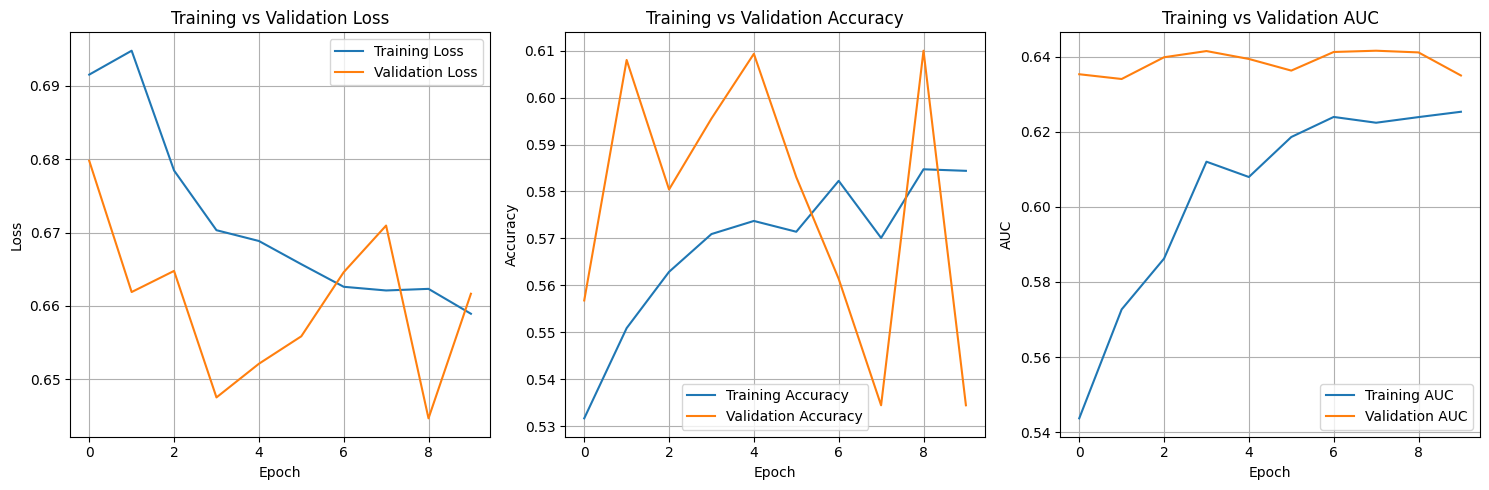

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix


# Training loss vs Validation Loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(single_layer_rnn_history.history['loss'], label='Training Loss')
plt.plot(single_layer_rnn_history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Training Accuracy vs Validation Accuracy
plt.subplot(1, 3, 2)
plt.plot(single_layer_rnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(single_layer_rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# AUC 
plt.subplot(1, 3, 3)
plt.plot(single_layer_rnn_history.history['auc'], label='Training AUC')
plt.plot(single_layer_rnn_history.history['val_auc'], label='Validation AUC')
plt.title('Training vs Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## IV. Result Analysis Before Fine-Tuning ##

- Overall, this Text Classifer is use-able with above 0.6 F1 score. Model performs moderately with a high recall rate, predicting 81% of actual disasters. However, both precision and accuracy suffer, with half of the predicted disasters being wrong (48.9%).

### Details ###
- F1 is solid (above 0.60), so model is usable. However, precision and accuracy suffer — need to reduce false positives.
- In general, despite the spikes around epoch 7, no overfitting is detected. This model might benefit with longer training or learning rate decay to smooth the spikes.
- AUC score steadily increase on both training and validation result. This indicates threshold tuning might improve F1 score. 

## V. Hyper-parameter Fine-Tuning by increasing training epoch with early stopping ##

* Since both validation and training AUC increase steadily, model might not have reached optimal result with 10 training epochs.
* To avoid overfitting, early stopping plus checkpoint saving will be implemented to record best model result.
* Less number of filters encouraging to focus on essential patterns rather than memorizing training data.

- Three epoch number will be used for performance comparison:
  - 10
  - 20
  - 30

In [71]:
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def train_epochs(epoch_count, name):  
    print(f"Traing for {name}...")
    early_stop = EarlyStopping(monitor='val_auc', patience=3, restore_best_weights=True, mode='max')
    checkpoint = ModelCheckpoint(f"{name}_best.h5", monitor='val_auc', save_best_only=True, mode='max')

    epoch_tuning_rnn_model = Word2VecRNNClassifier(initial_embedding_params, sequence_model_params)
    epoch_tuning_rnn_model.load_glove_embeddings(GLOVE_FILEPATH, tokenizer, embedding_dim=GLOVE_EMBEDDING_DIMENSION)
    epoch_tuning_rnn_model.build_model()    
    epoch_tuning_history = epoch_tuning_rnn_model.fit(
        X_train_rnn, y_train_rnn, X_val=X_val_rnn, y_val=y_val_rnn, 
        epochs=epoch_count, 
        batch_size=32, 
        class_weights=target_weight_dict, 
        callbacks=[early_stop, checkpoint]
    )
    epoch_tuning_eval_results =epoch_tuning_rnn_model.evaluate(X_val_rnn, y_val_rnn)
    if epoch_count == 30:
        epoch_tuning_rnn_model.save_model("rnn_30_epoch_final.h5")
    return epoch_tuning_history, epoch_tuning_eval_results

# evaluate_history_10_epoch, _ = train_epochs(10, "rnn_10_epoch")
evaluate_history_20_epoch, _ = train_epochs(20, "rnn_20_epoch")
evaluate_history_30_epoch, _ = train_epochs(30, "rnn_30_epoch")



Traing for rnn_20_epoch...
Matching Rate: 0.7283 (7283 out of 10000 words)
Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.5197 - auc: 0.5315 - loss: 0.6917 - val_accuracy: 0.4294 - val_auc: 0.6194 - val_loss: 0.6956
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5102 - auc: 0.5699 - loss: 0.6846 - val_accuracy: 0.5955 - val_auc: 0.6426 - val_loss: 0.6551
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5519 - auc: 0.5947 - loss: 0.6730 - val_accuracy: 0.5857 - val_auc: 0.6442 - val_loss: 0.6531
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5572 - auc: 0.6048 - loss: 281.3960 - val_accuracy: 0.6106 - val_auc: 0.6396 - val_loss: 0.6522
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5863 - auc: 0.6163 - loss: 0.6667 - val_accuracy: 0.5627 - val_auc: 0.6314 - val_loss: 0.6623
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5747 - auc: 0.6165 - loss: 0.6636 - val_accuracy: 

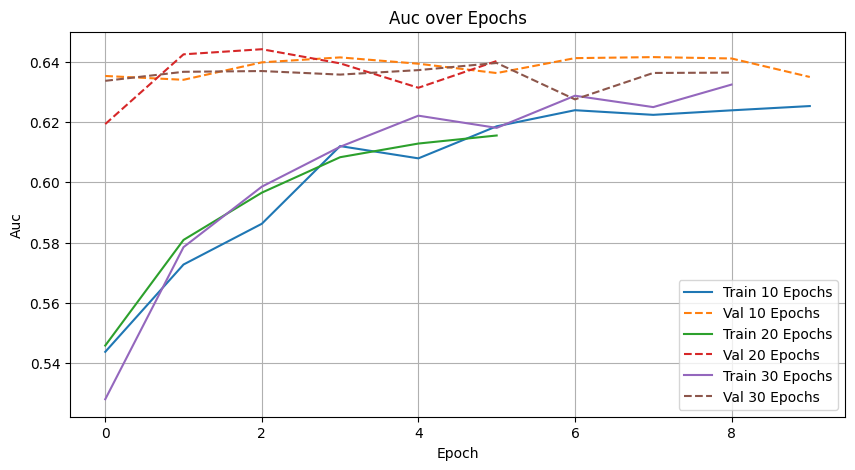

In [73]:

import matplotlib.pyplot as plt

history_10_epoch_df = pd.DataFrame(single_layer_rnn_history.history)
history_20_epoch_df = pd.DataFrame(evaluate_history_20_epoch.history)
history_30_epoch_df = pd.DataFrame(evaluate_history_30_epoch.history)

def plot_metric(metric):
    plt.figure(figsize=(10, 5))
    for hist, label in zip([history_10_epoch_df, history_20_epoch_df, history_30_epoch_df], ['10 Epochs', '20 Epochs', '30 Epochs']):
        plt.plot(hist[metric], label=f"Train {label}")
        plt.plot(hist[f'val_{metric}'], linestyle='--', label=f"Val {label}")
    plt.title(f'{metric.capitalize()} over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

plot_metric("auc")

## VI. Result Analysis after Fine-Tuning "Number of Epoch with Early Stopping" ##

### Result ###
- All three models (10, 20, 30 epochs) show improvement in training AUC over the first few epochs.
- 10 Epochs (with early stopping) may actually be optimal for this configuration.

### Key Insights to why or why not the hyper-parameter fine-Tuning worked ###
What worked:
- The 10-epoch run achieves the highest and most stable validation AUC.

What doesn't worked:
- All models stop early (before hitting full 20 or 30 epochs), showing no gain in validation AUC from prolonged training.

Key Insight:
- The 30-epoch model reaches the highest training AUC overall but shows a flattening near the end — suggesting diminishing returns from additional training.
- The 20- and 30-epoch models (red and brown dashed lines) show slight fluctuations and may even degrade a little — possible sign of overfitting.
- Thus, for the best model submission, **epoch configurations (10 epoch with early stopping) remains the best choice.**


## VII. Hyper-parameter Fine-Tuning with "Different number of RNN units" ##

RNN units define the dimensionality of the hidden state vector. This affects how much information the model can capture over time steps (sequences). 
For example:
* A small number (e.g., 64) may lack capacity to model complex temporal dependencies.
* A large number (e.g., 256) may overfit or slow down training.

- Three set of RNN units will be used for performance comparison:
  - 64 RNN Units
  - 128 RNN Units
  - 256 RNN Units

In [77]:
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def train_more_rnn_units(rnn_count):  
    print(f"Traing for different number of RNN unit: {rnn_count}...")
    early_stop = EarlyStopping(monitor='val_auc', patience=3, restore_best_weights=True, mode='max')
    checkpoint = ModelCheckpoint(f"rnn_count_{rnn_count}_best.h5", monitor='val_auc', save_best_only=True, mode='max')

    rnn_unit_tuning_params = {
        'rnn_units': rnn_count,
        'dense_units': 32,
        'dropout_rate': 0.2,
        'num_classes': 2,
        'use_gru': False,
        'learning_rate': 1e-3
    }
    
    rnn_tuning_rnn_model = Word2VecRNNClassifier(initial_embedding_params, rnn_unit_tuning_params)
    rnn_tuning_rnn_model.load_glove_embeddings(GLOVE_FILEPATH, tokenizer, embedding_dim=GLOVE_EMBEDDING_DIMENSION)
    rnn_tuning_rnn_model.build_model()    
    rnn_tuning_history = rnn_tuning_rnn_model.fit(
        X_train_rnn, y_train_rnn, X_val=X_val_rnn, y_val=y_val_rnn, 
        epochs=10, 
        batch_size=32, 
        class_weights=target_weight_dict, 
        callbacks=[early_stop, checkpoint]
    )
    rnn_tuning_eval_results =rnn_tuning_rnn_model.evaluate(X_val_rnn, y_val_rnn)
    rnn_tuning_rnn_model.save_model("rnn_unit_{rnn_count}.h5")
    return rnn_tuning_history, rnn_tuning_eval_results

evaluate_history_64_units, _ = train_more_rnn_units(64)
evaluate_history_128_units, _ = train_more_rnn_units(128)
evaluate_history_256_units, _ = train_more_rnn_units(256)



Traing for different number of RNN unit: 64...
Matching Rate: 0.7283 (7283 out of 10000 words)
Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.4969 - auc: 0.5041 - loss: 0.6980 - val_accuracy: 0.5496 - val_auc: 0.6214 - val_loss: 0.6893
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5370 - auc: 0.5650 - loss: 19242.0391 - val_accuracy: 0.5220 - val_auc: 0.5684 - val_loss: 0.7941
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5308 - auc: 0.5237 - loss: 1.4511 - val_accuracy: 0.5030 - val_auc: 0.5548 - val_loss: 0.6882
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4974 - auc: 0.5332 - loss: 0.7011 - val_accuracy: 0.4616 - val_auc: 0.5202 - val_loss: 0.6941
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Evaluation Results:
loss: 0.6893
compile_metrics: 0.5496
f1_score: 0.6007
Model saved to rnn_unit_{rnn_count}.h5
Traing for different number of RNN unit: 128...
Matching Rate: 0.7283 (7283 out of 10000 words)
Epoch 1

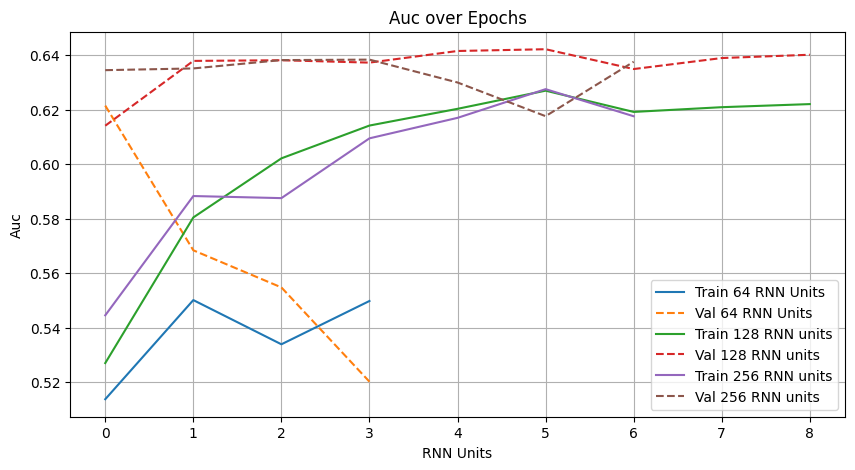

In [79]:

import matplotlib.pyplot as plt

history_64_units_df = pd.DataFrame(evaluate_history_64_units.history)
history_128_units_df = pd.DataFrame(evaluate_history_128_units.history)
history_256_units_df = pd.DataFrame(evaluate_history_256_units.history)

def plot_metric(metric):
    plt.figure(figsize=(10, 5))
    for hist, label in zip([history_64_units_df, history_128_units_df, history_256_units_df], ['64 RNN Units', '128 RNN units', '256 RNN units']):
        plt.plot(hist[metric], label=f"Train {label}")
        plt.plot(hist[f'val_{metric}'], linestyle='--', label=f"Val {label}")
    plt.title(f'{metric.capitalize()} over Epochs')
    plt.xlabel('RNN Units')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

plot_metric("auc")

## VI. Result Analysis after Fine-Tuning "Different number of RNN units" ##

### Result ###
- Best model remains with 128 RNN units with highest AUC and accuracy.

### Key Insights to why or why not the hyper-parameter fine-Tuning worked ###
What worked:
- With 128 units, the model achieve best AUC and accuracy score. The 10-epoch run achieves the highest and most stable validation AUC.

What doesn't worked:
- All models stop early (before hitting full 20 or 30 epochs), showing no gain in validation AUC from prolonged training.

Key Insight:
- The 30-epoch model reaches the highest training AUC overall but shows a flattening near the end — suggesting diminishing returns from additional training.
- The 20- and 30-epoch models (red and brown dashed lines) show slight fluctuations and may even degrade a little — possible sign of overfitting.
- Thus, for the best model submission, **epoch configurations (10 epoch with early stopping) remains the best choice.**


## VI. Performance Analysis with Different Model Architectures ##

- Deeper model achieve higher traing and validation accuracy
  - 5 layer CNN reach 97% training accuracy, compared to 94% (3 layers), and 84% (2 layers)
  - 5 layer CNN reach 93% training accuracy, compared to 88% (3 layers), and 86% (2 layers)
  - Deeper network have greater capacity to learn more complex pattern

- Deeper model may introduce higher risk of overfitting
  - 5 layer model have relatively deeper gap between training and validation accuracy.
  - Performance gap widens with depth, suggesting a higher risk of overfitting and early stopping is required (next performance tuning).

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

class Word2VecMultiLayerRNNClassifier(Word2VecRNNClassifier):
    def __init__(self, embedding_params, sequence_model_params, class_weights=None, pretrained_embedding_path=None):
        super().__init__(embedding_params, sequence_model_params, class_weights, pretrained_embedding_path)
        self._sequence_model_params = sequence_model_params  # local storage in subclass

    def build_model(self):
        self.model = Sequential()

        if self.embedding_matrix is not None:
            self.model.add(Embedding(input_dim=self.vocabulary_size,
                                     output_dim=self.embedding_dimension,
                                     weights=[self.embedding_matrix],
                                     trainable=self.trainable_embeddings))
        else:
            self.model.add(Embedding(self.vocabulary_size, self.embedding_dimension))

        rnn_layer = GRU if self.use_gru else LSTM
        num_layers = self._sequence_model_params.get('num_rnn_layers', 1)

        for i in range(num_layers):
            return_seq = i < num_layers - 1
            self.model.add(Bidirectional(rnn_layer(self.rnn_units, return_sequences=return_seq, activation='relu')))
            self.model.add(Dropout(self.dropout_rate))

        self.model.add(Dense(self.dense_units, activation='relu'))
        self.model.add(Dropout(self.dropout_rate))
        self.model.add(Dense(1, activation='sigmoid'))

        self.model.compile(optimizer=Adam(self.learning_rate), loss='binary_crossentropy', metrics=['accuracy', AUC()])
        return self.model
print('model with multiple RNN layers')

model with multiple RNN layers


Matching Rate: 0.7283 (7283 out of 10000 words)
Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - accuracy: 0.5059 - auc_34: 0.5234 - loss: 0.6931 - val_accuracy: 0.4616 - val_auc_34: 0.6364 - val_loss: 0.7046
Epoch 2/10
  7/191 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5113 - auc_34: 0.5517 - loss: 0.6908

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: accuracy,auc_34,loss,val_accuracy,val_auc_34,val_loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_auc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5600 - auc_34: 0.5880 - loss: 0.6819 - val_accuracy: 0.5069 - val_auc_34: 0.6425 - val_loss: 0.7052
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5621 - auc_34: 0.6043 - loss: 13160.2090 - val_accuracy: 0.5568 - val_auc_34: 0.6159 - val_loss: 0.6698
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5726 - auc_34: 0.6081 - loss: 0.6692 - val_accuracy: 0.5575 - val_auc_34: 0.6368 - val_loss: 0.6607
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5504 - auc_34: 0.5969 - loss: 0.9918 - val_accuracy: 0.5345 - val_auc_34: 0.6394 - val_loss: 0.6701
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5525 - auc_34: 0.6136 - loss: 0.6647 - val_accuracy: 0.5949 - val_auc_34: 0.6397 - val_loss: 0.6471
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5626 - auc_34: 0.6153 - loss: 0.6657 - val_accuracy: 0.5607 - val_auc_34: 0.6411 - val_loss: 0.6636
Epoch

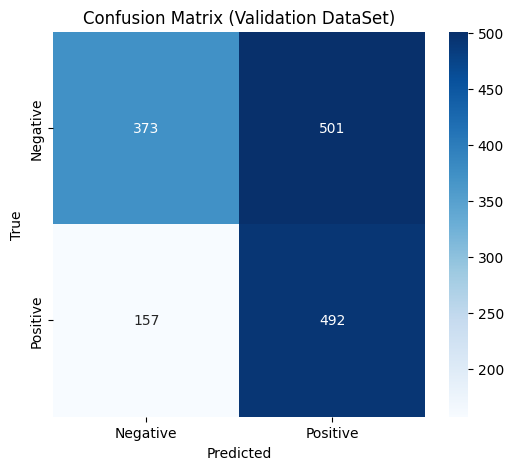


Confusion Matrix Metrics:
True Negatives (TN): 373
False Positives (FP): 501
False Negatives (FN): 157
True Positives (TP): 492


In [91]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# load pre-trained embedding and evaulate model
GLOVE_EMBEDDING_DIMENSION = 100
GLOVE_FILEPATH = '/kaggle/input/glove-twitter-27b-100d-from-standford-nlp/glove.twitter.27B.100d.txt'

early_stop = EarlyStopping(monitor='val_auc', patience=3, restore_best_weights=True, mode='max')
checkpoint = ModelCheckpoint(f"rnn_w_attention.h5", monitor='val_auc', save_best_only=True, mode='max')

X_train_multiple_rnn, X_val_multiple_rnn, y_train_multiple_rnn, y_val_multiple_rnn = train_test_split(X_train_glove, y_train, test_size=0.2, random_state=42)

layers_sequence_model_params = {
    'rnn_units': 128,
    'dense_units': 32,
    'dropout_rate': 0.2,
    'num_classes': 2,
    'use_gru': False,
    'learning_rate': 1e-3,
    'num_rnn_layers': 2  
}
multiple_layer_rnn_model = Word2VecMultiLayerRNNClassifier(initial_embedding_params, layers_sequence_model_params)
multiple_layer_rnn_model.load_glove_embeddings(GLOVE_FILEPATH, tokenizer, embedding_dim=GLOVE_EMBEDDING_DIMENSION)
multiple_layer_rnn_model.build_model()

multiple_layer_rnn_history = multiple_layer_rnn_model.fit(
    X_train_multiple_rnn, y_train_multiple_rnn, X_val=X_val_multiple_rnn, y_val=y_val_multiple_rnn, 
    epochs=10, 
    batch_size=32, 
    class_weights=target_weight_dict, 
    callbacks=[early_stop, checkpoint]
)

multiple_layer_rnn_eval_results = multiple_layer_rnn_model.evaluate(X_val_multiple_rnn, y_val_multiple_rnn)
y_test_preds_multiple_rnn = multiple_layer_rnn_model.predict(X_test_glove)
multiple_layer_rnn_model.save_model("rnn_multiple_layer_model.h5")



# display confusion matrix
y_pred_eval_multiple_rnn = multiple_layer_rnn_eval_results['y_pred']
cm = confusion_matrix(y_val_multiple_rnn, y_pred_eval_multiple_rnn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

plt.title('Confusion Matrix (Validation DataSet)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("\nConfusion Matrix Metrics:")
print(f"True Negatives (TN): {cm[0,0]}")
print(f"False Positives (FP): {cm[0,1]}")
print(f"False Negatives (FN): {cm[1,0]}")
print(f"True Positives (TP): {cm[1,1]}")



3. Model Architecture (25 pts)

Describe your model architecture and reasoning for why you believe that specific architecture would be suitable for this problem. 

Since we did not learn NLP-specific techniques such as word embeddings in the lectures, we recommend looking at Kaggle tutorials, discussion boards, and code examples posted for this challenge.  You can use any resources needed, but make sure you “demonstrate” you understood by including explanations in your own words. Also importantly, please have a reference list at the end of the report.  

There are many methods to process texts to matrix form (word embedding), including TF-IDF, GloVe, Word2Vec, etc. Pick a strategy and process the raw texts to word embedding. Briefly explain the method(s) and how they work in your own words.

Build and train your sequential neural network model (You may use any RNN family neural network, including advanced architectures LSTM, GRU, bidirectional RNN, etc.). 

In [10]:
print('3')

3


4. Results and Analysis (35 pts)

Run hyperparameter tuning, try different architectures for comparison, apply techniques to improve training or performance, and discuss what helped.

Includes results with tables and figures. There is an analysis of why or why not something worked well, troubleshooting, and a hyperparameter optimization procedure summary.

In [11]:
print('4')

4


## XI. Prepare final CNN model for submission ##

- Model Architecture: Single layer RNN (128 units)
- Training over 10 epoch with early stopping callback

In [12]:
print('5')

5
